<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-DAF/blob/main/LSTM__DAF_data_Galeras_italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Importando Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')
vt_etna = np.loadtxt('/gdrive/MyDrive/Sismos/ETNA/sismos_VT_etna.csv', delimiter=",")
lp_italia = np.loadtxt('/gdrive/MyDrive/Sismos/ETNA/sismos_lp_island(1600).csv', delimiter=",")

Concatenando df de entrenamiento y prueba

In [ ]:
df_VT = pd.concat([df_test_1, df_train_1], axis=0)
df_LP = pd.concat([df_test_2, df_train_2], axis=0)
df_TOR = pd.concat([df_test_3, df_train_3], axis=0)
print(df_VT.shape, df_LP.shape, df_TOR.shape)

(1736, 13348) (402, 3000) (67, 27408)


Concatenando VT_Galeras con VT_Etna

# **Procesando data**

Transformando todo a array Numpy y quitando los valores NaN de los array

In [ ]:
x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values

x_VT[np.isnan(x_VT)] = 0.0
x_LP[np.isnan(x_LP)] = 0.0
x_TOR[np.isnan(x_TOR)] = 0.0

Uniformizando duración de los sismos a 3 segundos

In [ ]:
x_VT = x_VT[:, 0:3000]
vt_etna = vt_etna[:, 0:3000]
x_LP = x_LP[:, 0:3000]
lp_ita = np.pad(lp_italia, ((0, 0), (0, 1400)), mode='constant')
#lp_italia = np.pad(lp_italia, (0, 1400), mode='constant')
x_TOR = x_TOR[:, 0:3000]
print(x_VT.shape, x_LP.shape, x_TOR.shape, vt_etna.shape, lp_ita.shape)

(1736, 3000) (402, 3000) (67, 3000) (3000, 3000) (3000, 3000)


Concatenando VT Galeras con VT Etna

In [ ]:
x_VT = np.concatenate((x_VT, vt_etna), axis=0)
x_LP = np.concatenate((x_LP, lp_ita), axis=0)
print(x_VT.shape, x_LP.shape)

(4736, 3000) (3402, 3000)


Filtrando señales

In [ ]:
from scipy.signal import butter, filtfilt

# Frecuencia de corte
fc = 2
fs = 100
t = np.linspace(0, 30, 3000)
# Orden del filtro
order = 5

# Coeficientes del filtro Butterworth
b, a = butter(order, fc / (fs/2), btype='highpass')

# Filtrando la señal VT
VT_filt = filtfilt(b, a, x_VT)
VT_freq = np.fft.fft(VT_filt)

# Filtrando la señal LP
LP_filt = filtfilt(b, a, x_LP)
LP_freq = np.fft.fft(LP_filt)

# Filtrando la señal TOR
TOR_filt = filtfilt(b, a, x_TOR)
TOR_freq = np.fft.fft(TOR_filt)

Graficando las señales filtradas

In [ ]:
t = np.linspace(0, 30, 3000)

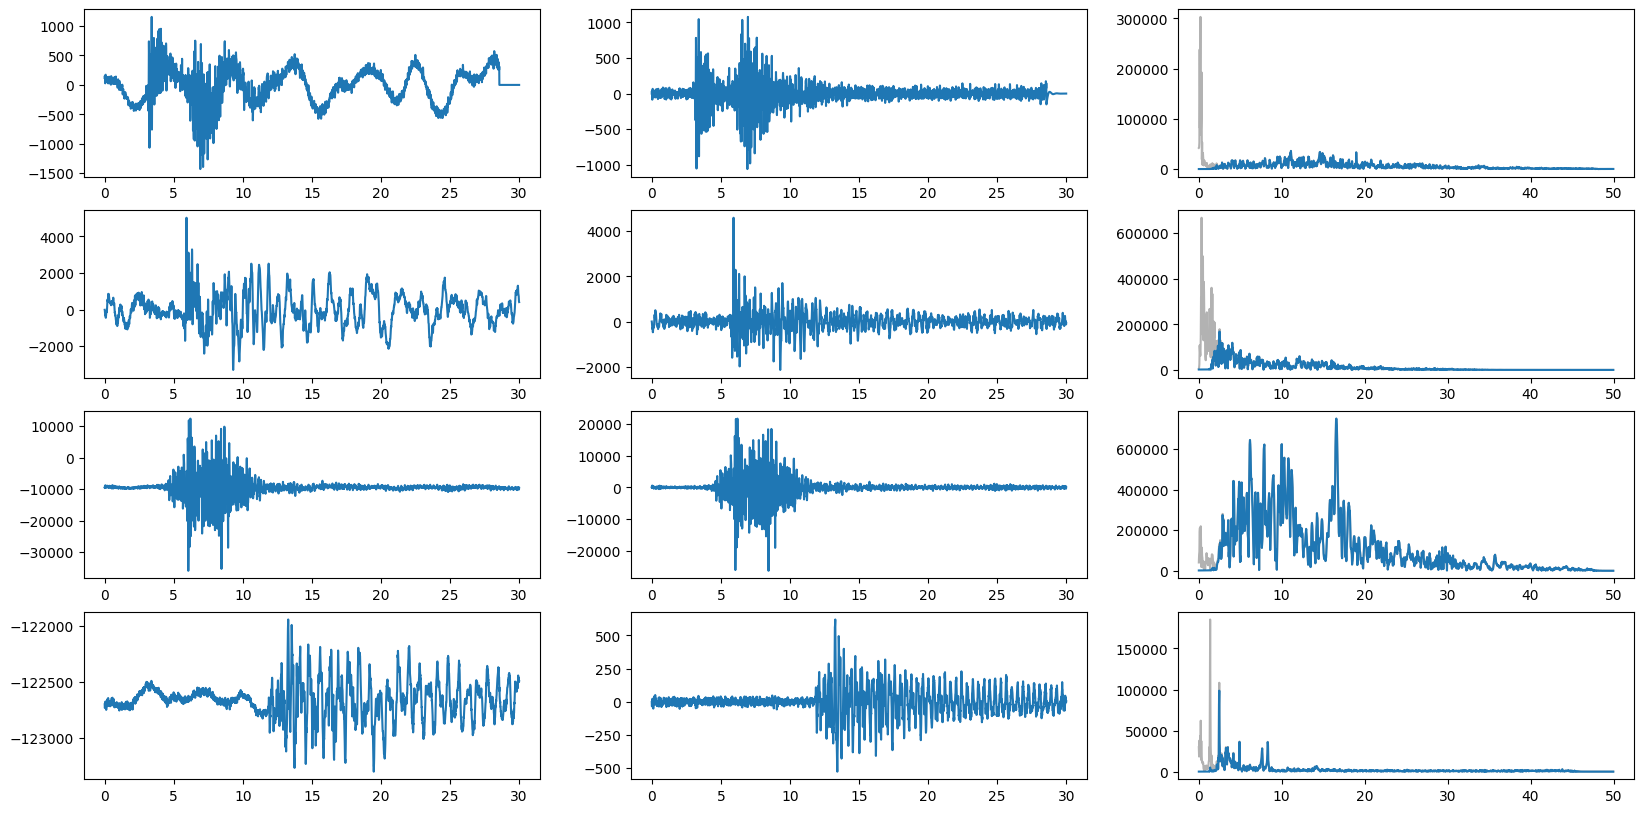

In [ ]:
freq = np.fft.fftfreq((3000), 1/fs)  
pos_mask = np.where(freq > 0)
freq_pos = freq[pos_mask]

plt.figure(figsize=(20,10))

plt.subplot(431)
plt.plot(t, x_VT[10])
plt.subplot(432)
plt.plot(t, VT_filt[10])
plt.subplot(433)
Y = np.fft.fft(x_VT[10])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = VT_freq[10][pos_mask]
plt.plot(freq_pos,np.abs(X))

plt.subplot(434)
plt.plot(t, x_VT[2738])
plt.subplot(435)
plt.plot(t, VT_filt[2738])
plt.subplot(436)
Y = np.fft.fft(x_VT[2738])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = VT_freq[2738][pos_mask]
plt.plot(freq_pos,np.abs(X))

plt.subplot(437)
plt.plot(t, x_LP[310])
plt.subplot(438)
plt.plot(t, LP_filt[310])
plt.subplot(439)
Y = np.fft.fft(x_LP[310])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = LP_freq[310][pos_mask]
plt.plot(freq_pos,np.abs(X))

plt.subplot(4,3,10)
plt.plot(t, x_TOR[10])
plt.subplot(4,3,11)
plt.plot(t, TOR_filt[10])
plt.subplot(4,3,12)
Y = np.fft.fft(x_TOR[10])
Y = Y[pos_mask]
plt.plot(freq_pos,np.abs(Y), "k", alpha=0.3)
X = TOR_freq[10][pos_mask]
plt.plot(freq_pos,np.abs(X))

Normalizando señales

Mínimo y máximo originales: -4237122.6, 3878389.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -151163.5, 153625.9
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -36571.8, 37284.1
Mínimo y máximo normalizado: 0.0, 1.0


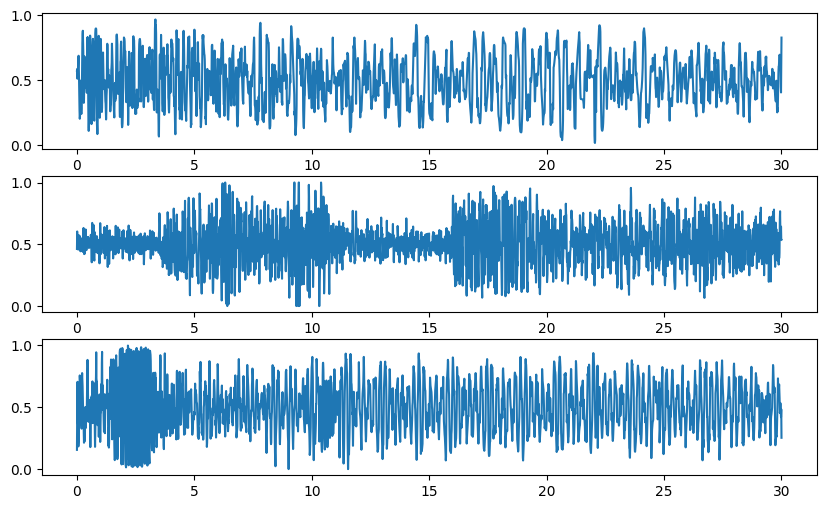

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
x_VT = min_max_scaler.fit_transform(VT_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(VT_filt), np.max(VT_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_VT), np.max(x_VT))) 


# Señales LP
x_LP = min_max_scaler.fit_transform(LP_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(LP_filt), np.max(LP_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_LP), np.max(x_LP))) 

# Señales Tor
x_TOR = min_max_scaler.fit_transform(TOR_filt)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(TOR_filt), np.max(TOR_filt)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(x_TOR), np.max(x_TOR)))   

# Graficando
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, x_VT[60])
plt.subplot(312)
plt.plot(t, x_LP[18])
plt.subplot(313) 
plt.plot(t, x_TOR[38])

Función para retirar *offset*

In [ ]:
def mean_norma(sinal):
        return sinal.apply(lambda x: (x-x.mean()), axis=1)  

Retirando offset

In [ ]:
df_VT = mean_norma(pd.DataFrame(x_VT))  # Señales VT
df_LP = mean_norma(pd.DataFrame(x_LP))  # Señales LP
df_TOR = mean_norma(pd.DataFrame(x_TOR))  # Señales Tor

x_VT = df_VT.values
x_LP = df_LP.values
x_TOR = df_TOR.values

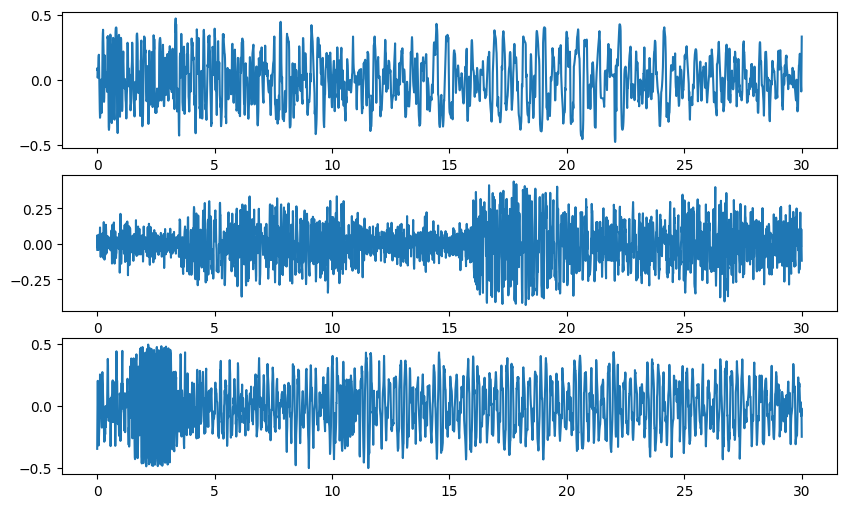

In [ ]:
# Graficando
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(t, x_VT[60])
plt.subplot(312)
plt.plot(t, x_LP[2018])
plt.subplot(313) 
plt.plot(t, x_TOR[38])

Concatenamos todos los datos para ser pre-procesados en el DAF

In [ ]:
data = np.concatenate((x_VT, x_LP, x_TOR), axis=0)

# Creando vector de etiquetas
y = np.concatenate([np.zeros(4736), np.ones(3402), np.full(67, 2)])
y = np.expand_dims(y, axis=1)     # necesario para poder concatenar las etiquetas con data por diferencia de dimensiones

# Concatenando las etiquetas al dataset 
data = np.concatenate((y,data), axis=1)

print(y, y.shape)
print(data.shape)

[[0.]
 [0.]
 [0.]
 ...
 [2.]
 [2.]
 [2.]] (8205, 1)
(8205, 3001)


Separando el set de entrenamiento y prueba teneindo en cuenta las clases, principalmente teniendo en cuenta las clases VT y LP provenientes de Italia

In [ ]:
X_test = data[np.r_[1389:1736, 4136:4736, 5058:5138, 7538:8138, 8192:8205]]
X_train = data[np.r_[0:1389, 1736:4136, 4736:5058, 5138:7538, 8138:8192]]
print(X_train.shape, X_test.shape)

(6565, 3001) (1640, 3001)


In [ ]:
train_counts = np.unique(X_train[:,0], return_counts=True)
test_counts = np.unique(X_test[:,0], return_counts=True)

print("Distribución de las clases en X_train:", train_counts)
print("Distribución de las clases en X_test:", test_counts)

Distribución de las clases en X_train: (array([0., 1., 2.]), array([3789, 2722,   54]))
Distribución de las clases en X_test: (array([0., 1., 2.]), array([947, 680,  13]))


Vector de etiquetas con la distribución de las clases teneindo en cuenta que estas se divivieron en X_train y X_test

In [ ]:
y = np.concatenate(((X_train[:,0]),(X_test[:,0])), axis=0)
print(y.shape)
X_train = X_train[:, 1:3001]
X_test = X_test[:, 1:3001]
print(X_train.shape, X_test.shape)

(8205,)
(6565, 3000) (1640, 3000)


# **D A F**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print('version de TensorFlow:' + tf.__version__)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.callbacks import EarlyStopping

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
version de TensorFlow:2.12.0


**Autoencoder I *sigmoide***

In [ ]:
np.random.seed(23)

timesteps = X_train.shape[1]    # numero de pasos de tiempo
dim_entrada = 1     # dimensión de la entrada   

# Entrada
entrada_sig = Input(shape=(timesteps, dim_entrada))
       
# Encoder
x = LSTM(2000, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001))(entrada_sig)
x = Dropout(0.25)(x)
x = LSTM(1000, activation='relu', return_sequences=True)(x)
x = Dropout(0.25)(x)
encoded_sig = LSTM(800, activation='relu', return_sequences=True, name='bottleneck_layer')(x)

# Decoder 
x = LSTM(1000, activation='relu', return_sequences=True)(encoded_sig)
x = Dropout(0.25)(x)
x = LSTM(2000, activation='relu', kernel_regularizer=l2(0.0001), return_sequences=True)(x)
x = Dropout(0.25)(x)
decoded_sig = TimeDistributed(Dense(1, activation='sigmoid'))(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_sig_lstm = Model(inputs=entrada_sig, outputs=decoded_sig)

autoencoder1_sig_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3000, 1)]         0         
                                                                 
 lstm_18 (LSTM)              (None, 3000, 2000)        16016000  
                                                                 
 dropout_11 (Dropout)        (None, 3000, 2000)        0         
                                                                 
 lstm_19 (LSTM)              (None, 3000, 1000)        12004000  
                                                                 
 dropout_12 (Dropout)        (None, 3000, 1000)        0         
                                                                 
 bottleneck_layer (LSTM)     (None, 3000, 800)         5763200   
                                                                 
 lstm_20 (LSTM)              (None, 3000, 1000)        720400

**Autoencoder I *tanh***

In [ ]:
np.random.seed(23)

timesteps = X_train.shape[1]
dim_entrada = 1   

# Entrada
entrada_tan = Input(shape=(timesteps, dim_entrada))   

# Encoder
x = LSTM(2000, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001))(entrada_tan)
x = Dropout(0.25)(x)
x = LSTM(1000, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.15)(x)
encoded_tan = LSTM(800, activation='relu', return_sequences=True, name='bottleneck_layer')(x)

# Decoder 
x = LSTM(1000, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001))(encoded_tan)
x = Dropout(0.15)(x)
x = LSTM(2000, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.25)(x)
decoded_tan = TimeDistributed(Dense(1, activation='tanh'))(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_tan_lstm = Model(inputs=entrada_tan, outputs=decoded_tan)

autoencoder1_tan_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 3000, 1)]         0         
                                                                 
 lstm_25 (LSTM)              (None, 3000, 2000)        16016000  
                                                                 
 dropout_18 (Dropout)        (None, 3000, 2000)        0         
                                                                 
 lstm_26 (LSTM)              (None, 3000, 1000)        12004000  
                                                                 
 dropout_19 (Dropout)        (None, 3000, 1000)        0         
                                                                 
 bottleneck_layer (LSTM)     (None, 3000, 800)         5763200   
                                                                 
 lstm_27 (LSTM)              (None, 3000, 1000)        7204

Aplicando Autoencoders I

In [ ]:
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder1_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_tan.fit(X_train, X_train,    
                           epochs=15,
                           batch_size=32,
                           validation_data=(X_test, X_test),    
                           shuffle=True)

Epoch 1/15


ResourceExhaustedError: ignored

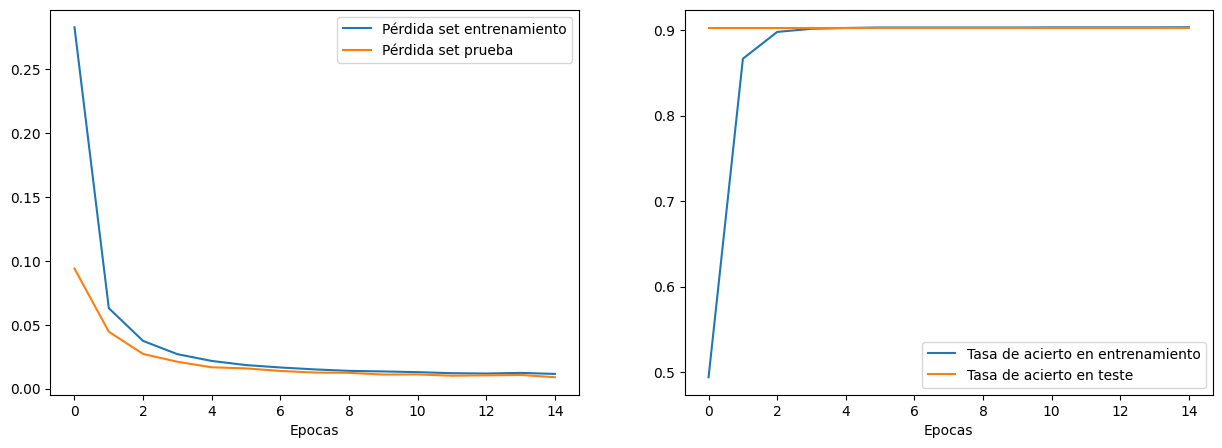

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder1_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_sig.fit(X_train, X_train,    
                           epochs=15,
                           batch_size=128,
                           validation_data=(X_test, X_test),    
                           shuffle=True)

Epoch 1/15
52/52 [==============================] - 3s 16ms/step - loss: 0.2955 - accuracy: 7.6161e-04 - val_loss: 0.1643 - val_accuracy: 0.0000e+00
Epoch 2/15
52/52 [==============================] - 1s 11ms/step - loss: 0.1508 - accuracy: 1.5232e-04 - val_loss: 0.1435 - val_accuracy: 0.0000e+00
Epoch 3/15
52/52 [==============================] - 1s 11ms/step - loss: 0.1416 - accuracy: 1.5232e-04 - val_loss: 0.1403 - val_accuracy: 0.0000e+00
Epoch 4/15
52/52 [==============================] - 1s 12ms/step - loss: 0.1449 - accuracy: 0.0000e+00 - val_loss: 0.1435 - val_accuracy: 0.0000e+00
Epoch 5/15
52/52 [==============================] - 1s 12ms/step - loss: 0.1325 - accuracy: 0.0076 - val_loss: 0.1229 - val_accuracy: 0.0018
Epoch 6/15
52/52 [==============================] - 1s 13ms/step - loss: 0.1226 - accuracy: 0.0594 - val_loss: 0.1205 - val_accuracy: 0.3378
Epoch 7/15
52/52 [==============================] - 1s 12ms/step - loss: 0.1209 - accuracy: 0.1158 - val_loss: 0.1194 - va

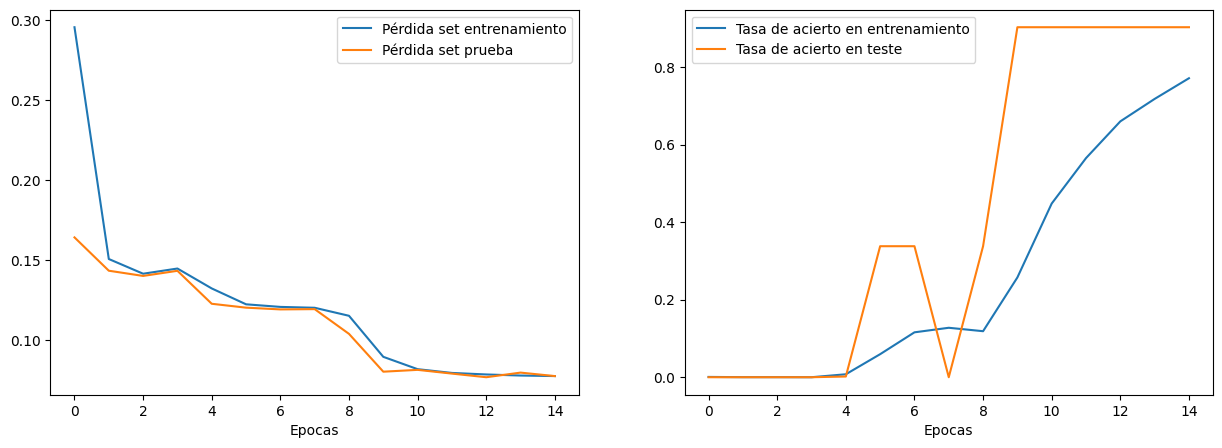

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_1sig = bottleneck.predict(X_test)
rep_train_1sig = bottleneck.predict(X_train)
print(rep_test_1sig.shape)
print(rep_train_1sig.shape)

206/206 [==============================] - 0s 1ms/step
(1640, 800)
(6565, 800)


In [ ]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_1tan = bottleneck.predict(X_test)
rep_train_1tan = bottleneck.predict(X_train)
print(rep_test_1tan.shape)
print(rep_train_1tan.shape)

206/206 [==============================] - 0s 2ms/step
(1640, 800)
(6565, 800)


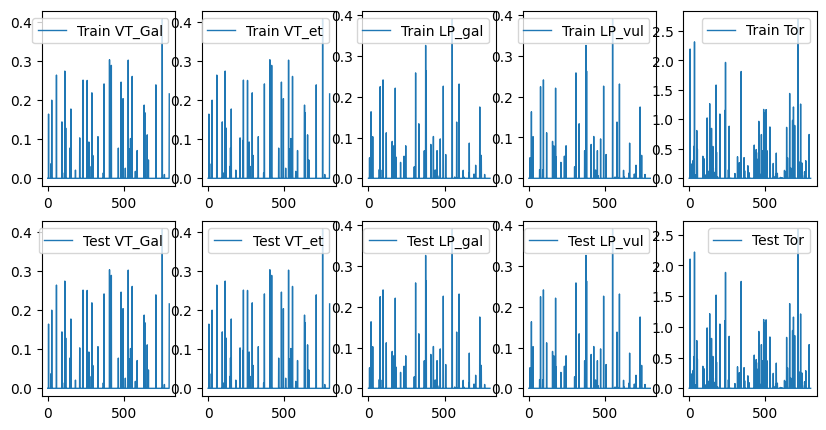

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,5,1)
plt.plot(rep_train_1tan[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,5,2)
plt.plot(rep_train_1tan[3000], linewidth=1)
plt.legend(labels=["Train VT_et"])
plt.subplot(2,5,3)
plt.plot(rep_train_1tan[4000], linewidth=1)
plt.legend(labels=["Train LP_gal"])
plt.subplot(2,5,4)
plt.plot(rep_train_1tan[5115], linewidth=1)
plt.legend(labels=["Train LP_vul"], loc='upper right')
plt.subplot(2,5,5)
plt.plot(rep_train_1tan[6555], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,5,6)
plt.plot(rep_test_1tan[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,5,7)
plt.plot(rep_test_1tan[900], linewidth=1)
plt.legend(labels=["Test VT_et"])
plt.subplot(2,5,8)
plt.plot(rep_test_1tan[990], linewidth=1)
plt.legend(labels=["Test LP_gal"])
plt.subplot(2,5,9)
plt.plot(rep_test_1tan[1530], linewidth=1)
plt.legend(labels=["Test LP_vul"])
plt.subplot(2,5,10)
plt.plot(rep_test_1tan[1635], linewidth=1)
plt.legend(labels=["Test Tor"])

**Autoencoder II *sigmoid***

In [ ]:
np.random.seed(23)

timesteps = rep_train_1sig.shape[1]
dim_entrada = 1   

# Entrada
entrada_s = Input(shape=(timesteps, dim_entrada))         

# Encoder
x = LSTM(400, activation='relu', kernel_regularizer=l2(0.001))(entrada_s)
x = Dropout(0.05)(x)
encoded_s = LSTM(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = LSTM(400, activation='relu', kernel_regularizer=l2(0.001), return_sequences=True)(encoded_s)
x = Dropout(0.05)(x)
decoded_s = TimeDistributed(Dense(1, activation='sigmoid'))(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2sig= Model(inputs=entrada_s, outputs=decoded_s)

autoencoder1_2sig.summary()

800
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 400)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               

**Autoencoder II *tanh***

In [ ]:
np.random.seed(23)

timesteps = rep_train_1sig.shape[1]
dim_entrada = 1  

# Entrada
entrada_t = Input(shape=(timesteps, dim_entrada))          

# Encoder
x = LSTM(600, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
x = Dropout(0.05)(x)
x = LSTM(400, activation='relu', kernel_regularizer=l2(0.0001))(entrada_t)
#x = Dropout(0.05)(x)
encoded_t = LSTM(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = LSTM(400, activation='relu', kernel_regularizer=l2(0.0001))(encoded_t)
#x = Dropout(0.05)(x)
x = LSTM(600, activation='relu', kernel_regularizer=l2(0.0001), return_sequences=True)(encoded_t)
x = Dropout(0.05)(x)
decoded_t = TimeDistributed(Dense(800, activation='tanh'))(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)

autoencoder1_2tan.summary()

800
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_14 (Dense)            (None, 400)               320400    
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_16 (Dense)            (None, 600)               120600    
                                                                 
 dropout_11 (Dropout)        (None, 600)               0         
                                                                 
 dense_17 (Dense)            (None, 800)               480800    
                                                                 
Total params: 1,002,000
Trainable params: 1,002,000
Non

Aplicando Autoencoders II

In [ ]:
autoencoder1_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder1_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2sig.fit(rep_train_1sig, rep_train_1sig,    
                           epochs=20,
                           batch_size=128,
                           validation_data=(rep_test_1sig, rep_test_1sig),    
                           shuffle=True)

Epoch 1/20
52/52 [==============================] - 2s 9ms/step - loss: 0.5231 - accuracy: 0.4408 - val_loss: 0.1394 - val_accuracy: 0.5774
Epoch 2/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0722 - accuracy: 0.5735 - val_loss: 0.0342 - val_accuracy: 0.5774
Epoch 3/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.5770 - val_loss: 0.0191 - val_accuracy: 0.5774
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.5770 - val_loss: 0.0161 - val_accuracy: 0.5774
Epoch 5/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.5770 - val_loss: 0.0126 - val_accuracy: 0.5774
Epoch 6/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.5770 - val_loss: 0.0121 - val_accuracy: 0.5774
Epoch 7/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0121 - accuracy: 0.5770 - val_loss: 0.0121 - val_accuracy: 0.5774
Epoch 8/20
52/52 [==

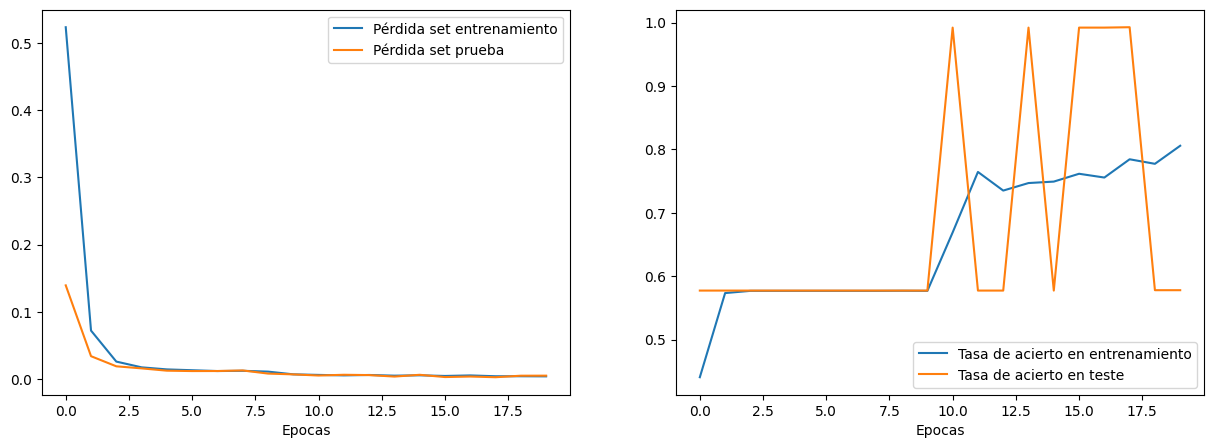

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder1_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2tan.fit(rep_train_1tan, rep_train_1tan,    
                           epochs=25,
                           batch_size=128,
                           validation_data=(rep_test_1tan, rep_test_1tan),    
                           shuffle=True)

Epoch 1/25
52/52 [==============================] - 2s 11ms/step - loss: 0.0462 - accuracy: 0.0000e+00 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 2/25
52/52 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 3/25
52/52 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 4/25
52/52 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 1.5232e-04 - val_loss: 0.0024 - val_accuracy: 0.5774
Epoch 5/25
52/52 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.5709 - val_loss: 0.0012 - val_accuracy: 0.5774
Epoch 6/25
52/52 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.8836 - val_loss: 0.0011 - val_accuracy: 0.9921
Epoch 7/25
52/52 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9720 - val_loss: 0.0010 - val_accuracy

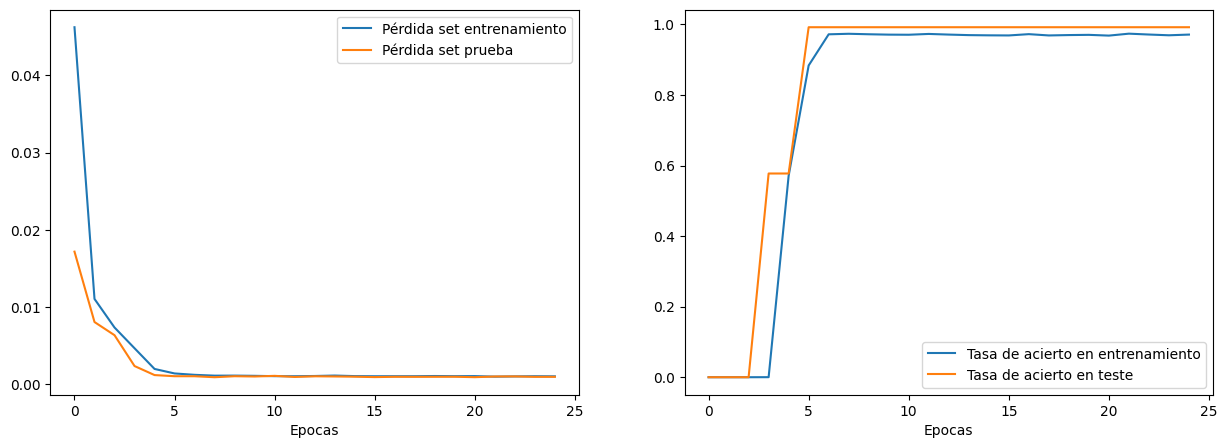

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [ ]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_1s = bottleneck.predict(rep_test_1sig)
rep_train_1s = bottleneck.predict(rep_train_1sig)
print(rep_test_1s.shape)
print(rep_train_1s.shape)

206/206 [==============================] - 0s 1ms/step
(1640, 200)
(6565, 200)


In [ ]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_1t = bottleneck.predict(rep_test_1tan) #rep_test_1tan
rep_train_1t = bottleneck.predict(rep_train_1tan) #
print(rep_test_1t.shape)
print(rep_train_1t.shape)

206/206 [==============================] - 0s 1ms/step
(1640, 200)
(6565, 200)


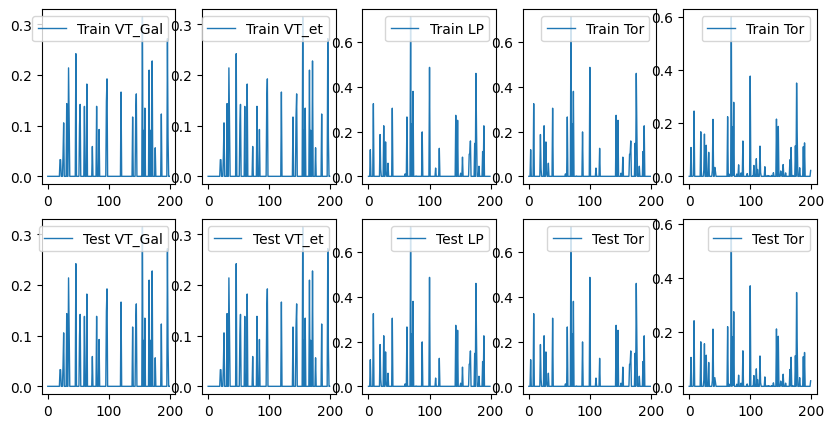

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,5,1)
plt.plot(rep_train_1t[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,5,2)
plt.plot(rep_train_1t[3000], linewidth=1)
plt.legend(labels=["Train VT_et"])
plt.subplot(2,5,3)
plt.plot(rep_train_1t[4000], linewidth=1)
plt.legend(labels=["Train LP"])
plt.subplot(2,5,4)
plt.plot(rep_train_1t[5115], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')
plt.subplot(2,5,5)
plt.plot(rep_train_1t[6555], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,5,6)
plt.plot(rep_test_1t[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,5,7)
plt.plot(rep_test_1t[900], linewidth=1)
plt.legend(labels=["Test VT_et"])
plt.subplot(2,5,8)
plt.plot(rep_test_1t[990], linewidth=1)
plt.legend(labels=["Test LP"])
plt.subplot(2,5,9)
plt.plot(rep_test_1t[1530], linewidth=1)
plt.legend(labels=["Test Tor"])
plt.subplot(2,5,10)
plt.plot(rep_test_1t[1635], linewidth=1)
plt.legend(labels=["Test Tor"])

# **Representaciones D A F**

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta una representación por cada tipo de señal solo para poder identificar las diferntes representaciones obtenidas.

In [ ]:
rep_train_1 = np.concatenate([rep_train_1s,rep_train_1t], axis=1) 
rep_test_1 = np.concatenate([rep_test_1s,rep_test_1t], axis=1) 
print(rep_test_1.shape)
print(rep_train_1.shape)

(1640, 400)
(6565, 400)


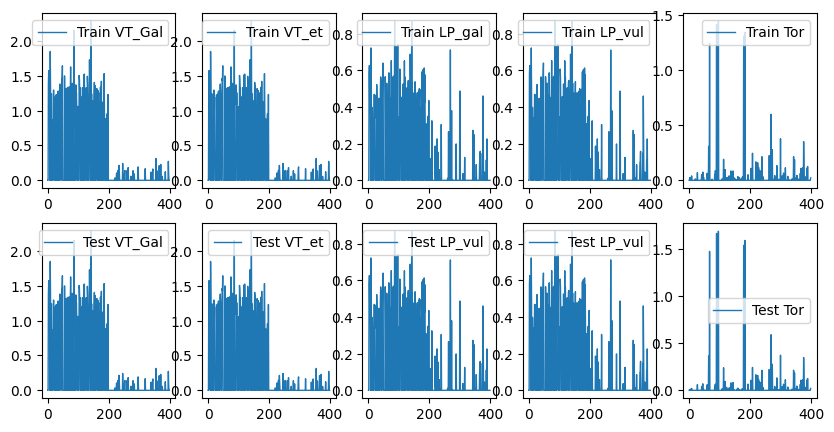

In [ ]:
# Observamos cómo el Autoencoder consigue representar 

# Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(10,5))
plt.subplot(2,5,1)
plt.plot(rep_train_1[1000], linewidth=1)
plt.legend(labels=["Train VT_Gal"])
plt.subplot(2,5,2)
plt.plot(rep_train_1[3000], linewidth=1)
plt.legend(labels=["Train VT_et"])
plt.subplot(2,5,3)
plt.plot(rep_train_1[4000], linewidth=1)
plt.legend(labels=["Train LP_gal"])
plt.subplot(2,5,4)
plt.plot(rep_train_1[5115], linewidth=1)
plt.legend(labels=["Train LP_vul"], loc='upper right')
plt.subplot(2,5,5)
plt.plot(rep_train_1[6555], linewidth=1)
plt.legend(labels=["Train Tor"], loc='upper right')

plt.subplot(2,5,6)
plt.plot(rep_test_1[300], linewidth=1)
plt.legend(labels=["Test VT_Gal"])
plt.subplot(2,5,7)
plt.plot(rep_test_1[900], linewidth=1)
plt.legend(labels=["Test VT_et"])
plt.subplot(2,5,8)
plt.plot(rep_test_1[990], linewidth=1)
plt.legend(labels=["Test LP_vul"])
plt.subplot(2,5,9)
plt.plot(rep_test_1[1530], linewidth=1)
plt.legend(labels=["Test LP_vul"])
plt.subplot(2,5,10)
plt.plot(rep_test_1[1635], linewidth=1)
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

**Normalización de las representaciones**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
Rep_train_s1 = min_max_scaler.fit_transform(rep_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_1), np.max(rep_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(Rep_train_s1), np.max(Rep_train_s1))) 
Rep_test_s1 = min_max_scaler.transform(rep_test_1)  

Mínimo y máximo originales: 0.0, 11.5
Mínimo y máximo normalizado: 0.0, 1.0


400


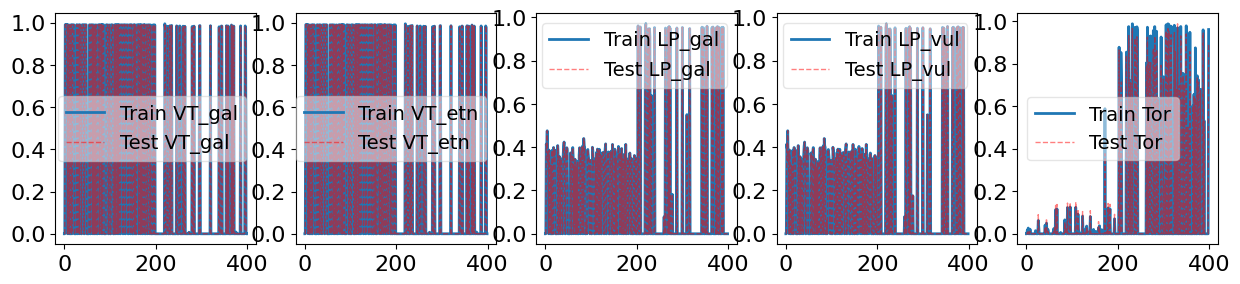

In [ ]:
# Graficando
n3 = Rep_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))

#fig, axs = plt.subplots(2, 2, figsize=(15, 15))

plt.figure(figsize=(15, 3))

plt.subplot(151)
plt.plot(Rep_train_s1[1000], lw=2, label="Train VT_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(152)
plt.plot(Rep_train_s1[3000], lw=2, label="Train VT_etn")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(153)
plt.plot(Rep_train_s1[4000], lw=2, label="Train LP_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(154) 
plt.plot(Rep_train_s1[5115], lw=2, label="Train LP_vul")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.subplot(155) 
plt.plot(Rep_train_s1[6555], lw=2, label="Train Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)



plt.subplot(151)
plt.plot(Rep_test_s1[300], 'r--', alpha=0.5, lw=1, label="Test VT_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(152)
plt.plot(Rep_test_s1[900], 'r--', alpha=0.5, lw=1, label="Test VT_etn")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(153)
plt.plot(Rep_test_s1[990], 'r--', alpha=0.5, lw=1, label="Test LP_gal")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(154)
plt.plot(Rep_test_s1[1530], 'r--', alpha=0.5, lw=1, label="Test LP_vul")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)
plt.subplot(155)
plt.plot(Rep_test_s1[1635], 'r--', alpha=0.5, lw=1, label="Test Tor")
plt.legend(fontsize='14', fancybox=True, framealpha=0.5)


plt.savefig('caracter_DAF2.pdf', dpi=400, format='pdf')

**Clasificador MLP**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [ ]:
#np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

3000
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_18 (Dense)            (None, 500)               1500500   
                                                                 
 dropout_12 (Dropout)        (None, 500)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               50100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 3)                 303       
                                                                 
Total params: 1,550,903
Trainable params: 1,550,903
N

# Implementando Validación Cruzada Estratificada y Clasificación

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

Definimos la configuracipon de Validacipon Cruzada estratificada y luego el modelo de clasificación:

In [ ]:
cv = StratifiedShuffleSplit(n_splits=6, random_state=True)

clasificador = Model(inputs=entrada, outputs=saida)

A continuación se vuelve a concatenar los set de train y test para aplicar la Validación Cruzada Estratificada

In [ ]:
X = np.concatenate((Rep_train_s1, Rep_test_s1), axis=0)

y_label = y

Creando un vector y con la información de las etiquetas de la forma one-hot

In [ ]:
# Codificando vector de etiquetas de la forma one-hot 
y = (np.eye(3)[y_label.astype(int)]).reshape((8205,3))


print(X.shape, y_label.shape, y.shape)

(8205, 400) (8205,) (8205, 3)


In [ ]:
print(y, y_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] [0. 0. 0. ... 2. 2. 2.]


**Aplicando la curva ROC:**

StratifiedShuffleSplit(n_splits=6, random_state=True, test_size=None,
            train_size=None)
TRAIN: [ 906  582 2238 ... 7920  149 2800] TEST: [5037   70 4627 6619 2797 1046 2219  379 5176 5859 6526 7487 1485 4698
 3236 2658 5095 8181 7476 7754 7842 1345 5833 3994 3094 8178 7819 1095
 1763  150 7712 7191 2224 3364 6744 4578 4273 7843 2189 4470 3356 4307
 4907  152 2877 4792 5498 7411 2587 4283 7619 3238 6669 4300 6908  183
 5159 7472 6299 2171 4666  253 2574  601  832 3592 4927 6026 4542 6097
 6418 7899 3826 5510 5109 7579 5573 7404  617 5796 3829 4469  609 2840
 2994 6132 3377 6771 3519 2895 1150 4743 4169 2690 5230  450 7643 3775
 3836 8082 5167   52 2980 1478 7710 2092 5386 2628 6078 1295 4095  319
 2195 6255 5897 7690 7323 7185  417 5798 7738 1638 5554 1799 7748 5237
 5164 1996 1627 4450  728 4359  873 2033 4497 7974 1927 7413 1706 3453
 7606 6013 5385 2693  884 6694 2561  269 5812 5531 2599 5723 5856 3050
 3462 2052 1616 1806 2269 8021 1834 2729 3596 1639 1880 3098  213 4799


TRAIN: [6849 2144  887 ... 3340 6007 7471] TEST: [3357 1120 3232 7653  693 6699  849 5877 2380 4864 4222 4131 2202 6851
 6394 8111 6677 4917 5864 7180 7373 3189 5649 6014  835 8016 3032 7898
 4492 6031 3617 4436 7316 3287 7896 2046    5 5913 5759 2955 5198 4347
 4149 4228 6322 5657 5082  447 5361 5978 2423 8106 1695 3556  473 3681
 2673 7257 8142 7245 6498 5878  553 2454 7341  800 6122 3173 6184 4484
 6478 4801 3533 2789 6707 2112 7577 1528 3428 3659 3857 2306 4658  459
 4606 3814 4944 8083  226 2132 3907 4119 6564 6629 4310 1439 4274  685
 7690 5710 6866 6892 7038 4941 5415 6642 4390 1233 5832 1597 7387 4767
 6457 3322 4012 6490 6687 5655  376 7624 1966 7082 1990 5842 1977 5435
 5010 4533 3772 6109 6172 4863 6247  909 6795 1489 5758 6818 1502 3033
 3981 1928 7270 1256 5155 7337 7802 1819 8056 6157 7466 5794  951 2394
 4775 5131 2704 3518 2498 5286 6802 3352 1111 1371 7703 7431 4660 7356
 1329 1608 8081 2310  373 6858 3487 2901 1466 2728 6242  234 3815  200
   68 6841 5909  133  169 54

TRAIN: [1918 1598 7317 ... 6061 2128 2925] TEST: [ 248 1170 2988 5338 3321 6294 6478 4629  474 3361 1831 6755 5907 1958
 3006  755 3905 4286 3740  745 7345 1814 4525 4109 2077 4944 2828 2638
 4646 1143 7797 3241 1477  685 2881 1921 5143 4222 3289 7358  237 4738
  554 5068 8184 7593 6680 2197 5655 1099 5597 8173 7749 6201  897  345
 5722  418 5358 5423 4645 7946 3201 7955 1048 2830  204 5871 4657 2561
 2980 4493  601 4497 5284 3166 1231 4741 4827 1940 3936 7433 7570 4945
 3305 3725 7294 4921 6020 1057  490 2188 6032 7574 4207  324 2049 6467
 5424 7563 1339 4529  235 1869  531 5532 7323 7901 6765  582 5496 1528
  296 3572 4456 8093 7195 6074 2624 2108  774  864 3950 1103 1224 1017
 7026 1826  251 2843 3253 6663 1058  940 3032   84  475 5576 6456 1476
 3606 1705 3799 1557 1778 6042 4307  670 3839  785 7159 8194 8196 2974
 7369 4276   21 5099 4026 4830 7633 7180 2809 7829 4402  650 3027 5757
 2924 6189 4547 1926 2839 2107 5197 8090 4656 6301 5953 6846 2827 2384
 2756 2597 7398  558 7487 15

TRAIN: [4367 1745 2603 ... 4892  726 2938] TEST: [3321 2144 4506 3989 1159 5573  844 4754 8001 3861  250 5492 5239 8149
 7211  799 3780 1470 5707 3278 5800 7292 4935 6145 5370 2027 3788 2022
 4187 6967 7473 7843 6024 7764 8136 4119 4625 3560 4009 8171 6869 2278
 1089 3707 2763 1752 7004 5031 2854 3482 1861 5320 8046  910 2748 7917
 1683 6325 1707 5184 5473 3575 2789  289 1929  583 7025 4126 7650    9
 1876 2295 3396 3838 4776 7094 2589 1704  789 4877 2683 1718 2624 2583
 1076  830 7872 5621 4708  117  908 3074  758  331 6175 3431   65 4232
 1684 3020 4787 5711 3729 2539 3439 6169 4640  332 5072 2787 6602 7992
 3381 5898 7011  572 1557 1158 8145 6981 8030 8092 7091 1964 4435 7554
 4497 2238  891 5257 6235  867 7315 6238 6029 5317 1280 6641 7797 4614
  803 7106  473 3985 3914 7039 6156 4671 3532 5737 3918 5349 5220 2268
 1440  397 4184 3643 3769 6492 2677 5986 1360 3205 2367 7248 3856 5353
 7033 5094 2737 5955 1083  166 3605 1827 4010 3171 1954 7374 2427 4782
 1191 6683 7793 1767 2383 43

TRAIN: [4573 3445 7008 ... 1020  895 1631] TEST: [1882 6217 6158 1649  867 4004 7398 4514 7445 6800 8080 1962 4595 1936
 4028 5434 5999 4807 5449 7948 7856 7198 7742 1002 1878 1639   98 2969
 2600 3010 1716 3442 2785 1377 1329 5662 1613 5388 4002 6444 2713 7735
 7658  339 7863  180 1287 1484 2526 4802 3097 4818 5029 1009  117  735
 3343 6287 4701 5164 2552 1193 5389 7659 2062 1617 3260 1742 1838  866
  290 5707 3353 7254 5161  955 6418 3193 7898 6454 4232 3267 2365 3415
 5003 7501  703 8204 4045 8018 3327 1491 6882 5547 3192 2640 5063 6866
 7762 5784  854 2712 3964 7335 3830 5803  940 2175 1688  725 7986 3938
 7567 8071 3456 7564  123 6816 6452 1111 1276 3927 2788 6664 5943 4817
 5402  105 4054 3767 1307 4153 6995 2496 4433 6508  784 3739 1031 2763
 6723 4001 4651 2453 1088 1567 4486  104 2086 5542 3876 6040 3999 4361
 1813 7422 3439 5567 3846 7772 4952 7518 5190 4741  508 7005 4661 5713
 7277  996 5024  789 1899 4559 2730 5908 6018 5033 3581 4016 4363 7896
 1334 3430 1522 4227 1739 40

TRAIN: [3885 5745 7611 ... 5604 1103 1049] TEST: [4926 4515 1176 7016 2698 4884 6947 8172 3791 1844 7415 6777  350 6423
 4405 7687  140 7729 2540 1837 7063 1361 8076 7213 2900 3155 5022 4420
 7029 5639  632 5832  820 7448 1677 6000 1378 2616 3303  113 2631 6175
  917 1300 1238 2803  436 2726 1266 3540  152 1130 3753 7491 5905 1198
   82 4601 6533 3889 4690 2913 1188 6979 3114 3379 1351 7728 4396 1197
 6950 3025 6874 7039 4145 6433 6448 4422 8048 1331 1950 2325 3787  806
 4722 1495 1207 4456 2266 5069 6921 7461 6015 3552 4027 3350 7860 2737
 7388 8107 5000  824 7740 5635   36 5844 1880 5169 1921 1502 6464 4035
 7989 1930 3258 4453 2571 3338  946 5641  381 8128 6002 5416  802 4473
 7561 2820 7209 7999  831 2053 5623 7633 3709 5799 2277 2082 5555 2073
 6306 4920 7275 8040  553 1040 7773  342 4488 6590 2448 1920 3094 2341
 3513 1634 5183 4090 1240 1918 5226 4586 5458 7203 3660 6131 3200 6516
 2559 2688 1128 3320 6146 6635 2148 6870 2051 6564 3301 4077 2793  700
 4654 5688   23 5896 1039 59

train -  [4262 3062   60]   |   test -  [474 340   7]
train -  [4262 3062   60]   |   test -  [474 340   7]
train -  [4262 3062   60]   |   test -  [474 340   7]
train -  [4262 3062   60]   |   test -  [474 340   7]
train -  [4262 3062   60]   |   test -  [474 340   7]
train -  [4262 3062   60]   |   test -  [474 340   7]


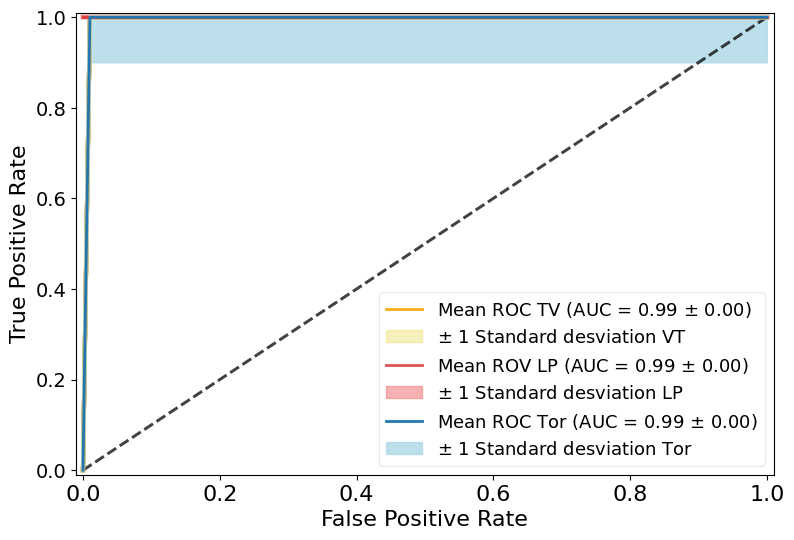

<Figure size 600x600 with 0 Axes>

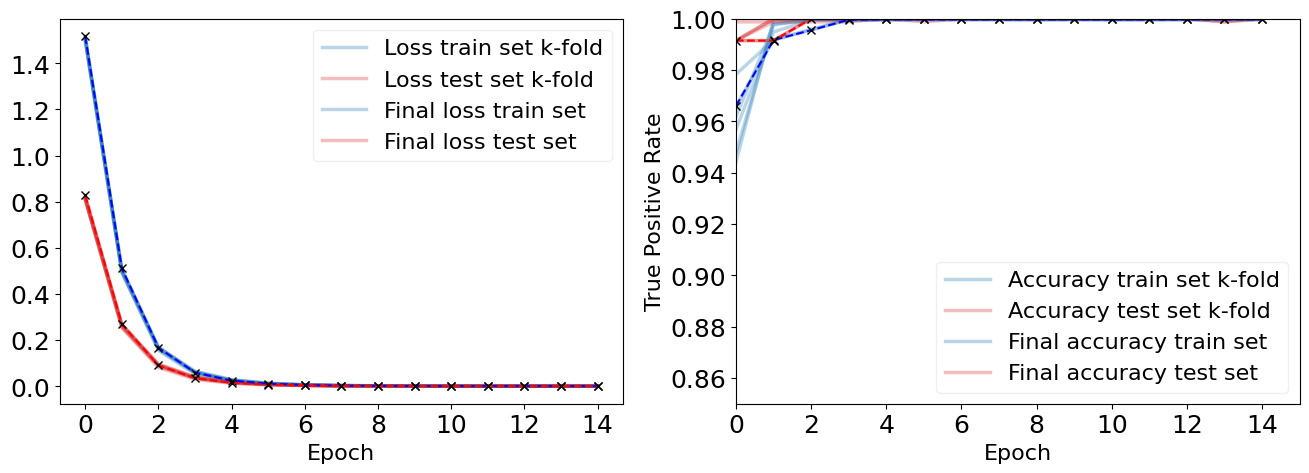

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle



print(cv)
StratifiedShuffleSplit(n_splits=6, random_state=True)

fig, ax = plt.subplots(1, figsize=(9,6))
tprs_mean_0 = []
tprs_mean_1 = []
tprs_mean_2 = []
aucs_0 = []
aucs_1 = []
aucs_2 = []
fold = 1

for train_index, test_index in cv.split(X, y_label):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  dim_entrada = X.shape[1]      
  entrada = Input(shape=(dim_entrada,))
  x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
  x = Dropout(0.25)(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.25)(x)
  saida = Dense(3, activation='softmax')(x)

  clasificador = Model(inputs=entrada, outputs=saida)
  clasificador.compile(optimizer='adam', loss='mae', metrics=['categorical_accuracy'])
  historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

  print("ENTRENAMIENTO EN EL FOLD %0.2F" %(fold))  
  y_pred = clasificador.predict(X_test)

  tprs = []
  Corte = []

  base_fpr = np.linspace(0,1,101)
  mean_fpr = np.linspace(0,1,100)

  
  # Curva ROC para la clase VT

  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 0], y_pred[:, 0])
    auc1 = roc_auc_score(y_test[:, 0], y_pred[:, 0]) # Es auc1, o deberia ser auc0???????? no importa porque luego forma un vector para cada tipo de sismo
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_0.append(auc1)

  Corte.append(th[np.argmax(tpr - fpr)])
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
          alpha=0.2)
  
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = 'orange',
      lw = 3,
      alpha = 0.9
  )
  tprs_mean_0.append(mean_tpr)

  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.xlabel('False Positive Rate', fontsize=16)

  
  # Curva ROC para la clase LP

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 1], y_pred[:, 1])
    auc1 = roc_auc_score(y_test[:, 1], y_pred[:, 1])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[-1] = 0.0
  tprs.append(interp_tpr)
  aucs_1.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightcoral",
      lw = 3,
      alpha = 0.99
  )
  tprs_mean_1.append(mean_tpr)

  
  # Curva ROC para la clase Tor

  tprs = []
  for i in range(len(y_pred)):
    fpr, tpr, th = roc_curve(y_test[:, 2], y_pred[:, 2])
    auc1 = roc_auc_score(y_test[:, 2], y_pred[:,2])
  
  interp_tpr = np.interp(mean_fpr, fpr, tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs_2.append(auc1)

  Corte.append(th[np.argmax(tpr-fpr)])

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  ax.plot(
      mean_fpr,
      mean_tpr,
      color = "lightblue",
      lw = 3,
      alpha = 0.99
  )

  tprs_mean_2.append(mean_tpr)
  ax.legend(loc="lower right", fontsize = 8)
  plt.xticks(fontsize=16), plt.yticks(fontsize=14)


  import matplotlib.pyplot as plt
  plt.figure(5, figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(historia.history["loss"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_loss"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  plt.subplot(1,2,2)
  plt.plot(historia.history["categorical_accuracy"], color = 'tab:blue', alpha = 0.3, lw = 2.5) 
  plt.plot(historia.history["val_categorical_accuracy"], color = 'tab:red', alpha = 0.3, lw = 2.5) 
  
  fold = fold + 1


for train, test in cv.split(X, y_label):
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y_label[train].astype('int64')), np.bincount(y_label[test].astype('int64'))))

plt.figure(3, figsize = (6,6))
tpr_0_final = np.mean(tprs_mean_0, axis=0)
std_tpr_0 = np.std(tpr_0_final, axis=0)
tprs_upper_0 = np.minimum(tpr_0_final + std_tpr_0, 1)
tprs_lower_0 = np.maximum(tpr_0_final + std_tpr_0, 0)

tpr_0_final[-1] = 1.0
mean_auc_0 = auc(mean_fpr, tpr_0_final)
std_auc_0 = np.std(aucs_0)
ax.plot(
    mean_fpr,
    tpr_0_final,
    color = "orange",
    label = "Mean ROC TV (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_0, std_auc_0),
    lw = 2,
    alpha = 0.9
)
ax.fill_between(
    mean_fpr,
    tprs_lower_0,
    tprs_upper_0,
    color = "khaki",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation VT",
)

tpr_1_final = np.mean(tprs_mean_1, axis=0)
std_tpr_1 = np.std(tpr_1_final, axis =0)
tprs_upper_1 = np.minimum(tpr_1_final + std_tpr_1, 1)
tprs_lower_1 = np.maximum(tpr_1_final - std_tpr_1, 0)

tpr_1_final[-1] = 1.0
mean_auc_1 = auc(mean_fpr, tpr_0_final)
std_auc_1 = np.std(aucs_1)
ax.plot(
    mean_fpr,
    tpr_1_final,
    color = "tab:red",
    label = "Mean ROV LP (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_1, std_auc_1),
    lw = 2,
    alpha = 0.8
)
ax.fill_between(
    mean_fpr,
    tprs_lower_1,
    tprs_upper_1,
    color = "lightcoral",
    alpha = 0.6,
    label = "$\pm$ 1 Standard desviation LP"
)

tpr_2_final = np.mean(tprs_mean_2, axis=0)
std_tpr_2 = np.std(tpr_2_final, axis=0)
tprs_upper_2 = np.minimum(tpr_2_final + std_tpr_2, 1)
tprs_lower_2 = np.maximum(tpr_2_final -std_tpr_2, 0)

tpr_2_final[-1] = 1.0
mean_auc_2 = auc(mean_fpr, tpr_2_final)
std_auc_2 = np.std(aucs_2)
ax.plot(
    mean_fpr,
    tpr_2_final,
    color = "tab:blue",
    label = "Mean ROC Tor (AUC = %0.2f $\pm$ %0.2f)" %(mean_auc_2, std_auc_2),
    lw = 2,
    alpha = 0.99
)
ax.fill_between(
    mean_fpr,
    tprs_lower_2,
    tprs_upper_2,
    color = "lightblue",
    alpha = 0.8,
    label = "$\pm$ 1 Standard desviation Tor"
)

ax.legend(loc="lower right", fontsize = 13, fancybox=True, framealpha=0.4)
ax.figure.savefig('ROC_DAF.pdf', dpi=400, format='pdf')

plt.figure(5, figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_loss"], 'xr--',mec='k', lw=1.5) 
plt.xlabel('Epoch', fontsize=16)
plt.xticks(fontsize=18), plt.yticks(fontsize=18)
plt.legend(labels=["Loss train set k-fold", 
                   "Loss test set k-fold",
                   "Final loss train set", 
                   "Final loss test set"], 
           fontsize='16', fancybox=True, framealpha=0.3)
plt.subplot(1,2,2)
plt.plot(historia.history["categorical_accuracy"], 'xb--',mec='k', lw=1.5) 
plt.plot(historia.history["val_categorical_accuracy"], 'xr--',mec='k', lw=1.5) 
plt.xlim(0, 15)
plt.ylim(0.85, 1.0)
plt.xlabel('Epoch', fontsize=16)
plt.legend(labels=["Accuracy train set k-fold", 
                   "Accuracy test set k-fold",
                   "Final accuracy train set", 
                   "Final accuracy test set"], 
           fontsize='16', fancybox=True, framealpha=0.3, loc='lower right') 
plt.xticks(fontsize=18), plt.yticks(fontsize=18)

plt.savefig('CrossVall_DAF.pdf', dpi=400, format='pdf')

**Matriz de confusión**

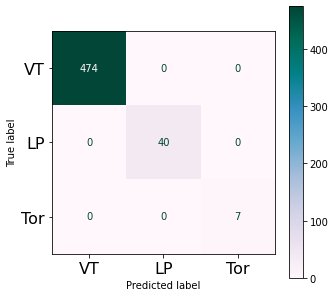

[[[ 47   0]
  [  0 474]]

 [[481   0]
  [  0  40]]

 [[514   0]
  [  0   7]]]
matriz VT  [[ 47   0]
 [  0 474]]
matriz LP  [[481   0]
 [  0  40]]
matriz Tor  [[514   0]
 [  0   7]]


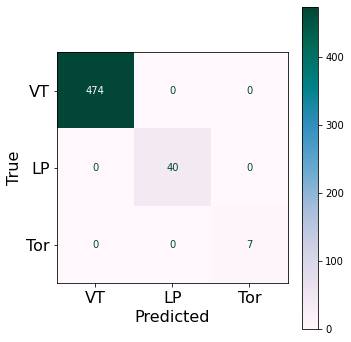

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

y_pred_ = np.rint(y_pred)
y_salida = []
for i in range(len(y_pred)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor') 


y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('True', fontsize=16)
plt.tight_layout()
plt.savefig('confusion_matrix.pdf', dpi=400, format='pdf')


plt.rcParams.update({'font.size': 16})
# plt.rc('font', **font)

cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)
cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]
print('matriz VT ', cmVT)
print('matriz LP ', cmLP)
print('matriz Tor ', cmTor)